# 03 - Time Series Analysis using Prophet

by [Alejandro Correa Bahnsen](albahnsen.com/)

version 1.0, June 2020

## Part of the class [Advanced Methods in Data Analysis](https://github.com/albahnsen/AdvancedMethodsDataAnalysisClass)


This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). Special thanks goes to [Parul Pandey](https://towardsdatascience.com/predicting-the-future-with-facebook-s-prophet-bdfe11af10ff)

## When hundreds or even thousands of forecasts are made, it becomes important to let machines do the hard work of model evaluation and comparison while efficiently using human feedback to fix performance problems :Creators of Prophet

Forecasting is a technique that uses historical data as inputs to make informed estimates that are predictive in determining the direction of future trends. It is an important and common data science task in organisations today. Having prior knowledge of any event can help a company tremendously in the formulation of its goals, policies and planning. However, producing high-quality and reliable forecasts comes with challenges of its own. Forecasting is a complex phenomenon both for humans and for machines. It also requires very experienced time series analysts which as a matter of fact are quite rare.

**Prophet** is a tool that has been built to address these issues and provides a practical approach to forecasting “at scale”. It intends to automate the common features of business time series by providing simple and tunable methods. Prophet enables the analysts with a variety of backgrounds to make more forecasts than they can do manually.

## An Overview of Prophet


Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

There is a white paper published by the creators of Prophet library. The paper highlights two main scenarios which were the motivation for the research behind Prophet.

First, completely automatic forecasting techniques can be hard to tune and are often too inflexible to incorporate useful assumptions or heuristics.

Second, the analysts responsible for data science tasks throughout an organization typically have deep domain expertise about the specific products or services that they support, but often do not have training in time series forecasting. Analysts who can produce high quality forecasts are thus quite rare because forecasting is a specialized skill requiring substantial experience

## Approach
Prophet follows an analyst-in-the-loop approach to business forecasting at scale.

![](https://raw.githubusercontent.com/albahnsen/AdvancedMethodsDataAnalysisClass/master/notebooks/images/pro1.png)

Schematic view of the analyst-in-the-loop approach to forecasting at scale (https://peerj.com/preprints/3190.pdf)

This approach begins by modelling a time series using the parameters specified by analysts, producing forecasts and then evaluating them. Whenever a performance issue or a need for human intervention crops up, these issues are flagged to human analysts so that they can then inspect the forecast and potentially adjust the model based on this feedback.
## Advantages:
- Open Source
- Accurate and fast
- Allows for a large number of people to make forecasts, possibly without training in time series methods;
- Tunable parameters
- Available for both Python and R

# Example

In [17]:
import pandas as pd
%matplotlib inline

births = pd.read_csv('../datasets/temperatures.csv')
df = pd.DataFrame()
df['ds'] = pd.to_datetime(births['Date'])
df['y'] = births['Temp']

In [18]:
df.head()

,ds,y
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


<AxesSubplot:>

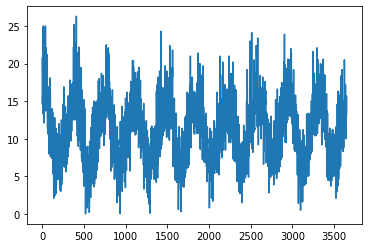

In [19]:
df['y'].plot()

With just a few lines, Prophet can make a forecast model every bit as sophisticated as the ARIMA model I built previously. Here, I’m calling Prophet to make a 6-year forecast (frequency is monthly, periods are 12 months/year times 6 years):

In [20]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot


m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


For forecasting, we need to tell Prophet how far to predict in future. For this, we need to make a dataframe for future predictions using make_future_dataframe . I would only like to predict the views for the next 6 years.

In [27]:
future = m.make_future_dataframe(periods=36*30, freq='D')
future.tail()

,ds
4725,1993-12-11
4726,1993-12-12
4727,1993-12-13
4728,1993-12-14
4729,1993-12-15


In [28]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4725,1993-12-11,14.171043,10.724403,17.766110
4726,1993-12-12,14.086238,10.775552,17.909519
4727,1993-12-13,14.223932,10.512022,17.559454
4728,1993-12-14,14.324581,10.827951,17.615161
4729,1993-12-15,14.410771,11.210399,17.791796


forecast is essentially a pandas dataframe and consists of a lot of fields. The predict method will assign each row in future a predicted value which it names yhat and the range is defined by yhat_lower andyhat_upper . These ranges can be considered as uncertainty levels.

### Plotting the Forecast
Visualisation, especially in Time Series data, makes more sense than mere numbers. Let’s plot the forecast by calling the Prophet.plot method and passing in the forecast dataframe.

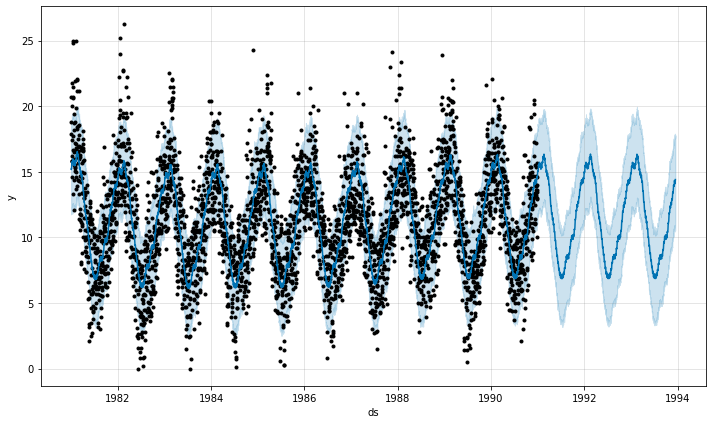

In [29]:
fig1 = m.plot(forecast)

We can also see the forecast components, by using the Prophet.plot_components method. This will show us the daily and weekly trends which makes the picture more clear. If you have data pertaining to different years, you can enable the yearly_seasonality to observe the yearly trends also.

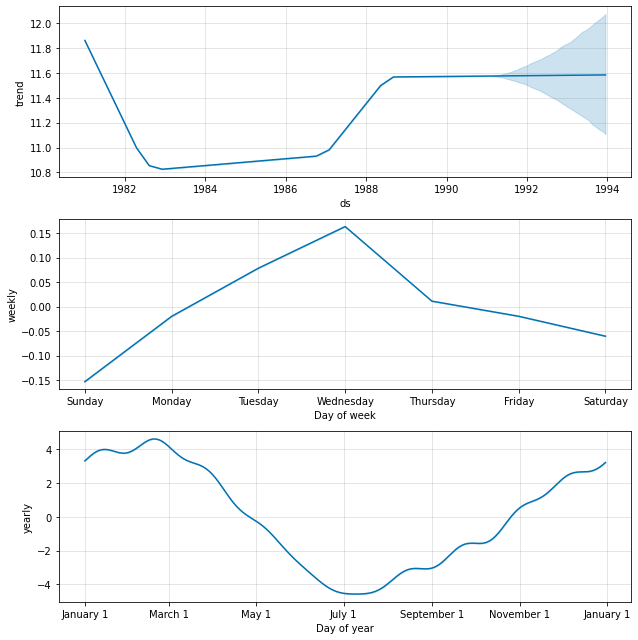

In [30]:
m.plot_components(forecast);

The trend shows an increase in the views with time which is good. Also, more views are garnered from Monday to Friday than at the weekends. The daily trend is more or less constant.

We can evaluate the performance of the predictions using the cross_validation function in Prophet.

In [31]:
from fbprophet.diagnostics import cross_validation

data_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days')

INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

Once we do the cross validation, we can compute performance metrics over the predictions. Prophet has already functions to compute MSE, RMSE, MAE, and MAPE.

In [32]:
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

performance_metrics(data_cv)

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,37 days,7.813089,2.795190,2.166234,0.155582,0.800975
1,38 days,7.672853,2.769992,2.150527,0.155266,0.804753
2,39 days,7.472472,2.733582,2.122987,0.153726,0.809994
3,40 days,7.435872,2.726879,2.120455,0.152170,0.810116
4,41 days,7.528531,2.743817,2.138040,0.155582,0.806338
...,...,...,...,...,...,...
324,361 days,7.728561,2.780029,2.190850,0.177744,0.815722
325,362 days,7.839178,2.799853,2.200219,0.178703,0.815722
326,363 days,7.826455,2.797580,2.204937,0.178703,0.820841
327,364 days,7.728159,2.779957,2.194151,0.178703,0.824497


Prophet already has incorporated a function that allows us to visualize the measures for every single prediction point. For example, the following graph shows the value of the MAEs for every single prediction at different time horizons, as well as a smoothed average that allows us to evaluate the quality of the predictions at different time horizons. As we can see, there is not much difference between the error of the model at different time horizons.

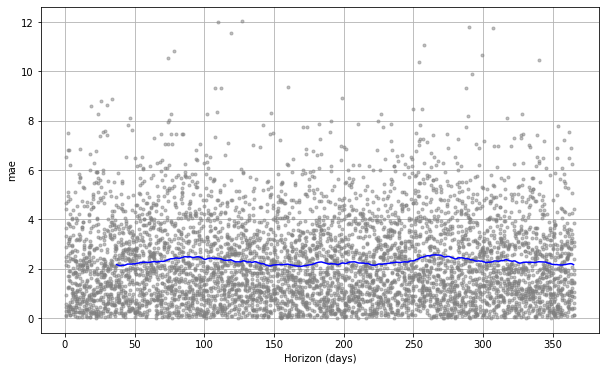

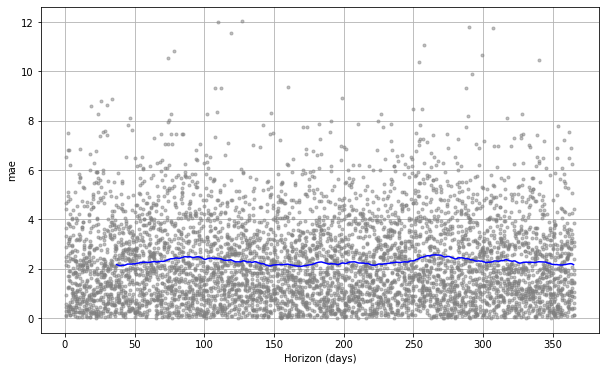

In [40]:
plot_cross_validation_metric(data_cv, metric='mae')

# Conclusion
Prophet makes the entire forecasting process easy and intuitive and also gives a lot of options. The actual advantage of this model can only be assessed on large datasets but Prophet does enable forecasting a large number and a variety of time series problems.